In [1]:
import pandas as pd

In [2]:
# Specifying the file path
file_path = "reviews.csv"

# Loading the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Displaying the DataFrame
print(df)

                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785           Devin Rivera   
2      825da34e-f65d-4ef3-991d-02d5291820d6          Heidi Kinsley   
3      a49c2875-651a-4c33-b79c-5813780d659e          Daniel Keller   
4      9482c75e-2e63-46ab-8c94-47273dd6a829          A Google user   
...                                     ...                    ...   
16782  e9cebff8-82ad-4191-b196-127a65e9036d  Alexandra Grafwallner   
16783  ab74c21c-3587-4393-a53d-4cb55f3e3c9b          Ljubica Pejic   
16784  0062b15d-6e4d-4f0a-9ea6-ef9b9420d923         Kamiyah Dorsey   
16785  85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d         Keturah Pender   
16786  8e2deadd-1a6a-4817-89dc-4bd9a198332c    Bhagwan Singh Virik   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...   
1      https://play-lh.googleuserconten

In [3]:
# Storing the 'content' column in the 'content' variable

content = df['content']

In [4]:
content

0        I have the same recurring tasks to do every da...
1        Instead of shopping around, I downloaded Any.d...
2        Why does every once in a while... out of the b...
3        Terrible Update! This app used to be perfect f...
4        This app is deceivingly terrible. There are so...
                               ...                        
16782                                        Excellent app
16783    I love it. Easy to use. Make my life organize....
16784    I love how I could make plans and check the ap...
16785                             Exactly what I needed!!!
16786                                          Very good 👍
Name: content, Length: 16787, dtype: object

## Converting to lowercase

In [5]:
# Defining the function to convert text to lowercase
def to_lowercase(text_series):
    return text_series.str.lower()

# Applying the function to the content
content = to_lowercase(content)


## Removing Links

In [6]:
import re
# Using re module
# Defining a function to remove links 
def remove_links(text):
    url_pattern = r'https?://\S+|www\.\S+'              # Defining the regular expression pattern that matches with URLs
    return re.sub(url_pattern, '', text)                # Substituting the URLs with an empty string


content = content.apply(remove_links)                   # Applying the remove_links function to the 'content'


## Remove next lines

In [7]:
# Defining the function to replace newline characters
def remove_newlines(text_series):
    return text_series.str.replace(r'\n', '', regex=True)      # Replacing newline characters with an empty string

# Applying the function to the content
content= remove_newlines(content)


## Removing words containing numbers

In [8]:
# Defining the function to remove words containing digits
def remove_words_with_digits(text_series):
    return text_series.apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x))
# The regular expression r'\b\w*\d\w*\b' matches words that contain at least one digit within them.
# These are replaced with an empty string

# Applying the function to the content
content = remove_words_with_digits(content)


## Removing extra spaces

In [9]:
# Defining a function to remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip() 
# The regular expression pattern r'\s+' matches with whitespace characters
# These are replaced with an empty string

# Applying the remove_extra_spaces function to the content 
content = content.apply(remove_extra_spaces)


## Removing Special Characters

In [10]:
# Defining the function to remove special characters
def remove_special_characters(text_series):
    return text_series.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
# The regular expression r'[^a-zA-Z0-9\s]' matches any character that is not a letter 
# These are replaced with an empty string

# Applying the function to the content
content = remove_special_characters(content)


## Removal of Stop words

### 1.Using nltk

In [11]:
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')                                # Downloading the stopwords corpus

# Defining the function to remove stopwords
def remove_stopwords(text_series):
    stop_words = set(stopwords.words('english'))
    return text_series.apply(
        lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
    )
# iterating over each word in the text (x.split())
# keeping only those words that are not in the set of stop words (word.lower() not in stop_words)

# Applying the function to the content
content = remove_stopwords(content)


### 2.Using gensim

In [12]:
from gensim.parsing.preprocessing import remove_stopwords

# Defining the function to remove stopwords using Gensim
def remove_stopwords_gensim(text_series):
    return text_series.apply(lambda x: remove_stopwords(x))

# Applying the function to the content
content = remove_stopwords_gensim(content)


## Stemming

In [13]:
from nltk.stem import PorterStemmer

# nltk.download('punkt')                                    # Downloading NLTK resources

# Defining the function to apply stemming
def apply_stemming(text_series):
    porter = PorterStemmer()                                # initializing a PorterStemmer object
    return text_series.apply(
        lambda x: ' '.join([porter.stem(word) for word in x.split()])
    )
# iterating over each word in the text (x.split()), applying stemming using porter.stem(word)

# Applying the function to the content
content = apply_stemming(content)



## Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer

# nltk.download('punkt')                                     # Downloading NLTK resources
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Defining the function to apply lemmatization
def apply_lemmatization(text_series):
    lemmatizer = WordNetLemmatizer()  # initializing a WordNetLemmatizer object
    return text_series.apply(
        lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)])
    )
# iterating over each word in the text (x.split()), applying lemmatization using lemmatizer.lemmatize(word).

# Apply the function to the content
content = apply_lemmatization(content)


## Data after preprocessing

In [15]:
content

0        recur task day need todolist remind buzz time ...
1        instead shop download anydo wide set day sched...
2        blue app ask updat acct email task list lost t...
3        terribl updat app perfect plan certain task co...
4        app deceivingli terribl nice design featur lik...
                               ...                        
16782                                            excel app
16783    love easi use life organ love way photo locat ...
16784                    love plan check app everyday love
16785                                         exactli need
16786                                                 good
Name: content, Length: 16787, dtype: object

## Word Cloud

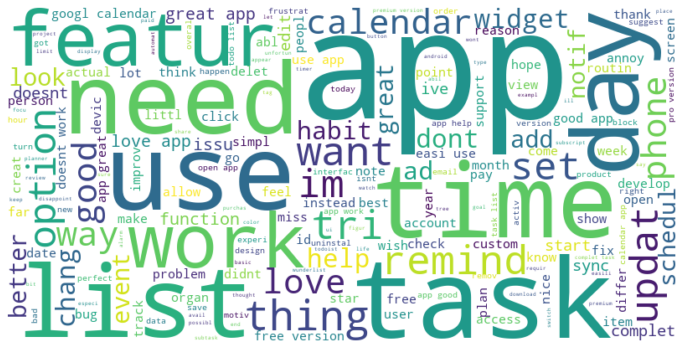

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenating all text data into a single string
text = ' '.join([str(text) for text in content])

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Displaying the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Plotting

### Word Frequency Histogram:

Plotting a histogram of word frequencies to visualize the distribution of word occurrences in the text data.

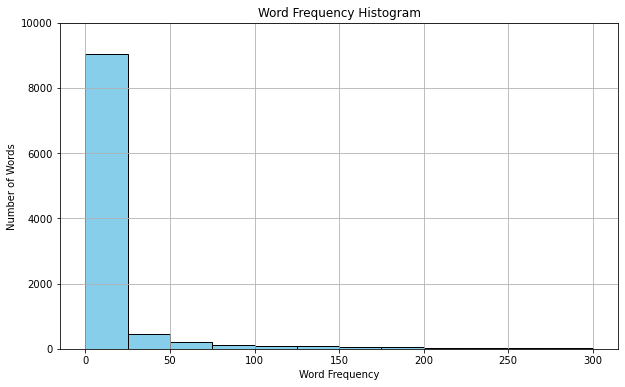

In [17]:
from collections import Counter

# Tokenizing the preprocessed text
tokens = ' '.join(content).split()  

# Calculating word frequencies
word_freq = Counter(tokens)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(word_freq.values(), bins=range(0, 301, 25), color='skyblue', edgecolor='black')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Word Frequency Histogram')
plt.grid(True)

# Setting the y-axis limits
plt.ylim(0, 10000)                                   # Adjusting the upper limit as needed

plt.show()


### Top N Most Common Words

Plotting a bar chart showing the top N most common words in the text data.
It visualizes the frequency of the most frequently occurring words in the text data


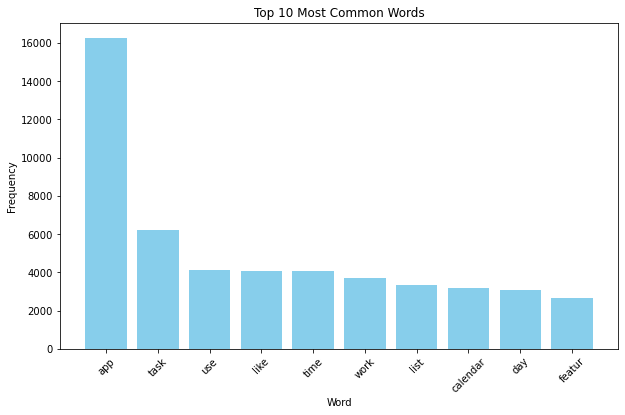

In [18]:
from collections import Counter

# Tokenizing the preprocessed text
tokens = ' '.join(content).split()  

# Calculating word frequencies
word_freq = Counter(tokens)

# Getting the top N most common words
top_n_words = word_freq.most_common(10)  # We can change 10 to any desired number of words

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_n_words], [word[1] for word in top_n_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

## Lexicon based Sentiment Analysis

Using the sentiment analysis tool VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [19]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Creating a SentimentIntensityAnalyzer instance
analyzer = SentimentIntensityAnalyzer()

# Function to classify text based on compound score
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Applying the sentiment classification function to the preprocessed text data
content_sentiment = content.apply(classify_sentiment)


print(content_sentiment)                                # Displaying the classified sentiment results

0        Negative
1        Positive
2        Negative
3        Positive
4         Neutral
           ...   
16782    Positive
16783    Positive
16784    Positive
16785     Neutral
16786    Positive
Name: content, Length: 16787, dtype: object


In [20]:
# Looping through all indexes and printing formatted output with text and it's sentiment
for index in range(len(content)):
    text = content.iloc[index]  # Get text by index
    sentiment = content_sentiment.iloc[index]  # Get sentiment by index
    print(f"{index}: {text}: {sentiment}")

0: recur task day need todolist remind buzz time problem app remind time start drift day give differ time day annoy fail screw im go better app ill let guy know updat suggest work app drift move: Negative
1: instead shop download anydo wide set day schedul taken coupl minut app seemingli random day week entri occas pick day year away minut fight app final schedul spent minut tri notif work luck fortun uninstal took second: Positive
2: blue app ask updat acct email task list lost time list went list awhil list lost time frustrat spend time new list cld spend time find app use especi reoccur disappoint: Negative
3: terribl updat app perfect plan certain task complet interfac easi understand plan day futur want perfectli broken date add task regardless need complet app say today complet elimin use app plan futur: Positive
4: app deceivingli terribl nice design featur like home screen widget nice user experi trash pop doesnt turn day wait turn phone alert app turn phone block app notif im 

1351: best gtd app slowli transform corpor frankenstein monster new featur useless individu user ad: Positive
1352: dont email log: Neutral
1353: app sent email account tri unsubscrib pain troubl app creat tri unbeliev: Negative
1354: worst app ask money remind remaind instantli ininstal app: Negative
1355: dont like: Negative
1356: lack optimis lanscap devic use fantast keyboard planet comput cosmo commun littl screen left landscap: Negative
1357: login googl account regist googl sso access: Neutral
1358: notif doesnt work poor experi: Positive
1359: app complic beginn: Neutral
1360: doesnt let creat account log previous account work fine tho dont like bc time purchas yearli subscript prob delet later today: Negative
1361: theme revert default icon updat chang updat revert wait inplac complet task: Neutral
1362: app unus login googl doesnt work abl account: Neutral
1363: doesnt tick thing: Neutral
1364: app intrus useless spend money super hard delet account stop spam: Negative
1365: 

1563: updat crash constantli subscript servic depend wors useless wast time: Negative
1564: app drain phone batteri got app recommend reddit post realis prefer tradit method list ultim left forgot exist ive app librari ruin phone batteri today got notif say app caus batteri drainag care: Positive
1565: latest version keep crash second load throw error messag forc stop android set help short time work flawlessli year befor august updat: Negative
1566: dear support im todoist decad year lot recent app work show app crash everytim samsung galaxi note android thank: Positive
1567: app year tonight start randomli crash repeatedli hadnt open restart forc stop fishi go im uninstal: Negative
1568: app keep crash second open crash: Negative
1569: app phone recogn pay pro versionhow updat: Negative
1570: constant email guy ive app honest review app ive busi minut properli check your constantli email everyday tip trick point your come needi forc delet app stop email: Positive
1571: app year love 

2612: love ticktick great interfac widget perfect unfortun todoist ticktick doesnt alexa capabl that deal breaker ifttt gmail provid good workaround recent chang gmail render function inoper ticktick board alexa ill come: Positive
2613: edit decreas review app slowunrespons ive report issu app email directli issu fix im paid version unaccept best todo list app set modifi version get thing method dont pay app share task make manag household task easier: Positive
2614: new notif useless phone vibrat old normal android notif vibrat phone notifi watch new notif pop silent easi miss ive tri chang set work dont understand use android buildin notif instead new thing option turn: Negative
2615: like lynn olson report samsung note problem freez email develop june time resolut uninstal app wish figur think app better design todoist gave star instead reason design: Positive
2616: glitch galor current unabl certain option black tri delet reinstal reset phone chang theme differ color shame favorit 

2840: came todoist tick tick allow manual sort list unfortuant time inconsist case sort manual choos sort date list priorityand chang accord platform star option sort manual case platform p arent colour theme carri desktop web site android app: Positive
2841: good app love function unfortun interfac look old plan graphic renov mayb new materi design guidelin: Positive
2842: amaz app major drawback add option sort assign individu help manag prioritis task manual instead depend option like sort prioriti date titl manual sort manag appear individu task: Positive
2843: like keep say remind arent work work click ticktick window phone tablet im guess dont click devic nice app: Neutral
2844: updat freez phone close app happen month fix best app ive great featur work super: Positive
2845: notif bug get audibl notif phone set vibrat vibrat set disturb pixel pixel snooz habit work task work fine: Negative
2846: good experi view need improv remind featur pop notif remind particularli doesnt work 

3893: great concept bad execut bug new player introduct feel like earli access surpris learn public releas year asham spend money transact game im usual harsh hope dev review person need major qol ux overhaul consid concept complet: Positive
3894: bug right begin registr imag didnt load slide intro regist info move screen gave error avatar good impress delet account websit: Positive
3895: app good help lot rememb thing issu server make imposs check thing recommend app requir server run server stabl: Positive
3896: doesnt work gamif featur detract need dont motiv im look featur like timer schedul time block assist subtask focus: Negative
3897: cute app year make configur minimum habit week mean habit tracker im leav review time tri come recal left time edit fanmad wiki doesnt help there featur request take dust year app github repo habit dont allow instanc set day week fail: Negative
3898: wait remov guild challeng im gon na regurgit review say fathom logic havent app know dock lot poin

4223: fould definit forc know feel like forget app exist minut think problem: Negative
4224: close month use tweak overal enjoy app tri updat goalhabit take moment actual regist press doesnt regist press doubl habitgo give point input habit time defeat purpos keep track: Positive
4225: app constantli glitch arent get better refresh help subscrib probabl wont renew cut servic avail websit like year end sight: Positive
4226: love concept app practic need work overwhelm moment feel like mayb quiz download app determin fast slow pace want thing unlock slow pace user standard thing access: Positive
4227: great app remov guild inn entir remov import social dimens use unoffici discord frequent rl friend parti your island lack account make hard want care app left lack: Positive
4228: nice list server reset slow wont refresh day wish there way member team: Positive
4229: product app beat habitica ive user year subscrib year love habitica recent reliabl softwar gone lot error sync error app dail

5204: edit add im lower rate dev stop ad new speci ive app year help phone focu great aquir interest tree got bore longer feel motiv use ive given lot thought think app need abil thing like design trail add stream waterfal like actual forest need design detail tree speci: Positive
5205: big issu timer end popup notif doesnt sound dismiss easi miss timer goe depend task dont want watch phone close finish work timer bairli earn coin timer make hard enjoy fun collect new tree gamifi task time liter reason got app im disappoint: Positive
5206: like app enjoy concept plant tree bush studi take break doesnt notifi timer end ive check phone notif set app im sure what go wish reward complet timer pretti plant feel bore use normal timer: Positive
5207: everytim phone auto shut notif kill tree annoy like concept stand reset timer everytim includ fact ill watch ad doesnt kill tree sec tree dead plu watch ad reset timer: Negative
5208: favourit improv includ stopwatch deep focu tag time fix way us

5452: hi app window microsoft store: Neutral
5453: that help: Positive
5454: thing like alarm finish plant love itif set tha alarmpleas tell: Positive
5455: block app way tri set use app tree beat purpos: Negative
5456: good: Positive
5457: like doubl reward option whlie watch add get reward think app connect internet slowli server wait minut watch add: Positive
5458: idk im miss app background make sen whatsoev edit chang permiss expect: Negative
5459: hate doesnt ring vibrat time: Negative
5460: nice: Positive
5461: attract app: Positive
5462: ocak tarihind bu uygulamaya kiisel veri izni verdim derin odaklanma zelliini aktifletirmek iin bildirimlerimi uygulama girilerimi engellemesi iin uygulamaya verdiim izin kiisel verilerimin ktye kullanmn onayladm manasna gelmez verdiim izinl sadec uygulamann odaklanmak iin cihazm sessiz almasn onaylamamdan ibarettir fazla yoktur tm haklarm savunacam ahsma ait bilgiler eriilmesini onaylamadm aksi taktird dava edeceimi bildiririm: Neutral
5463: go

6679: good: Positive
6680: notif dont work view startup option open monthli viewfor habit instead weekli viewal habit web version mobil great becaua spend time pc: Positive
6681: previous gave star concept great chang phone despit regist premium account say recognis email data lost sad come develop respond peopl email includ: Negative
6682: like inspir imag thumbsup dont like thunbsup imag chang right away: Positive
6683: recent bought premium widget freez work paricularli checklist widget frustrat bought app widget time long spend habit help: Positive
6684: like app remind dont work say fix im get notif remind: Positive
6685: daili pictur wont load new phone googl pixel im premium subscrib fix littl bug issu haha wan na pictur day: Positive
6686: : Neutral
6687: work fine: Positive
6688: paid premium sync hot mess ive manag recov reinstal: Negative
6689: remind come android: Neutral
6690: work remind stop work yesterday wont remind stuff anymor: Negative
6691: simpl nice motiv photo g

6952: simplist point: Neutral
6953: given star self inca need star: Neutral
6954: good: Positive
6955: track exercis great ensur week time: Positive
6956: easi track multipl habit: Neutral
6957: simpl help thank u: Positive
6958: good check app samsung app issu crash lot affect thought need know: Positive
6959: app ise work previou phone doesnt plu didnt sync account doesnt send notif: Neutral
6960: easi use doesnt send notif remind set day week: Neutral
6961: abl login app awesom: Neutral
6962: love simpl app: Positive
6963: nice app defin tri: Positive
6964: awesom new habit super current im purpos use: Positive
6965: pretti good track habit: Positive
6966: look great app: Positive
6967: love simpl yesno answer ask thing includ prompt want miss earlier app remind later day like hey thing appreci calendar look day thing didnt thing im tri break habit: Positive
6968: good app lot option: Positive
6969: main reason chose premium version app abl easili upload medium journal entri great d

8239: usual receiv notif app phone got stolen got new phone dont notif anymor give unrestrict access batteri: Negative
8240: great habit view overal scorecard your exceed meet set expectationsgo need meet set scorecard goal app work rare issu good app interest person develop: Positive
8241: pro ad free version unlimit remind habit notif alarm option remind con option chang remind alarm ring tone bland mechan design need motiv look theme anim add chart compar habit progress dailyweeklymonthli fantast ill buy ur app: Negative
8242: enjoy app unreli app crash dont lise data hundr task pretti load expo bug daili remind number task die week creat repeat task checkoff item add checkoff item creat task swallow enter creation notif alarm appear: Negative
8243: good app look nice function downsid lose habit creation progress phone lock app creat habit distract multitask frustrat potenti lot lost progress creat sub task frustrat: Positive
8244: far ok readi buy like look lay easi use sure featur

8336: app good expens unusebl student afford premium hope youll free make habit buy premium organ daili routin fair: Positive
8337: good habittask entri that: Positive
8338: love app purchas bad problem problem notif bad time fix bug: Negative
8339: decent habit tracker isnt get updat function room improv doesnt look like prioriti: Negative
8340: good app need notif pop screen sound tap dont know effect especi look phone screen help: Positive
8341: good ux star habit free version: Positive
8342: hard back restor data l sync mobil tablet: Positive
8343: daili timefram count numer valu walk time week twice day max count dont weekli quota: Neutral
8344: good problem tho notif appear open app im sure problem id love fix problem help lol tysm: Positive
8345: id like widget custom stand main widget list block white: Negative
8346: like app simpl get job downsid your allow track seven habit premium version: Positive
8347: id like stnc calendar free app awesom im give till sync id gladli pay t

8876: help need way quickli custom order goal current choic alphabet prioriti prefer click drag option widget specif like goal add specif time order want dont want specif time: Positive
8877: got app track medic perfect set want medicin yesno quantiti start date adher summari view track effect effect day chronolog list sunmari best tie medic databas ad bonu track real todo overal love app: Positive
8878: ive app year whilst tri habit track app simultan confid app lack develop pretti good job updat develop app gotten better consider ive start said app doesnt onlin version access browser desktop app id love onlin version soon: Positive
8879: im sahm want establish better daili routin fit bigger task day possibl app absolut perfect need love daili item dont carri day dont complet love app doesnt constantli ask want premium went premium day love app plu time fee monthli fee im far inclin purchas thank dev: Positive
8880: awesom app easi use free version extrem use upgrad premium addit bene

9261: list modifi problem experi month want mark task list chang remind list time uninstal app instal set work day issu think uninstal use remind past star star: Negative
9262: like basic featur buggi poorli thought exampl skip current task weekli task date week futur notif date seemingli random nearbi date date daylight save end notif hour: Positive
9263: reason app chang remind date pas remind set april itll sort task april task time list date wouldnt terribl deadlin prioriti badli app: Neutral
9264: lot featur larg cpu usag interact app crash phone like sync remind app phone interact result phone crash great featur work option function line: Positive
9265: app work sporad set remind dont activ updat work lock task list messag say list longer exist owner restrict access ownermanag task list sign paid microsoft subscript annoy paid app set sure critic thing fail like unrealist expect reentryset tasksdatesremind: Negative
9266: turn autosuggest app keep turn suggest hate turn option le

10046: turn pretti great app love day featur wishlist overdu item shown today list wunderlist highlight item keyboard close keyboard highlight extra step distract littl annoy abil hide flag email list like smart list perfect thank: Positive
10047: improv year fullblood task app long hope import wunderlist plu new task model coupl year reshap think action effect wish voic assist integr plug outlook app calendar option exist wunderlist reason: Positive
10048: year wunderlist nervou move new app shouldv known reason move complaint new task went instead list fix immedi complaint theyr quick care love addit featur didnt wunderlist ea use easi share list husband use work excel app: Positive
10049: recommend app absolut work wonder incred simpl user friendli lot nice option color custom list free remark feel anxiou handl number task app liter life chang basic perfect endless paperless altern planner that great: Positive
10050: transfer wunderlist enjoy featur especi abl share person fix comme

10293: im long time paid user work widget screen longer sync new event show old event tri uninstal reinstal work mail develop receiv respons: Neutral
10294: doesnt work automat rotat home screen turn phone sideway portrait widget tini: Neutral
10295: microsoft exchang calendar sync samsung smart watch correctli seen samsung mobil phone pl resolv: Positive
10296: advic enabl pipelinequeu task display instead show entir thingon display: Neutral
10297: randomli stop show calendar need purchas pointless: Negative
10298: instal phone pixel watch wouldnt transfer event calendar watch uninstal stay pixel pro phone despit effort rid sure dont want factori reset malwar: Positive
10299: sync calendar great concept error slow event customis need fix: Positive
10300: matter look like imag add work schedul show line triangl complet wedg shown imag: Positive
10301: bought tri didnt like itcant refund button: Negative
10302: complic remind disappear: Negative
10303: daili occur event show day event t

11333: sectrograph excel app pro user im particularli impress color scheme graph represent event display like suggest addit featur abil integr daili googl task app valuabl addit user want track time task place featur avail appreci provid instruct use: Positive
11334: differ way see calendar appoint: Neutral
11335: best app organ: Positive
11336: like alot im think buy version search bar calend creat calend futur forgot date love look know date event calend woul handi look birthday search: Positive
11337: best app intuit customiz lot support differ thing like wear o ive year phone edit got galaxi watch fulfil dream search circular schedul app serious amaz thank: Positive
11338: help organis day better visual represent: Positive
11339: great way entir day focu instead task: Positive
11340: bug overal great app paid upgrad abl hour display homescreen widget watch app refus hour clockdisplay hope get fix soon: Positive
11341: love: Positive
11342: : Neutral
11343: hand best app ive detail 

12756: unabl add screenshot task link sub task like list do clunki delet hour there way calendar help track daili task busi person: Positive
12757: paid subscript requir dont mention app detail tell good wonder pretti thing unintal mislead tri deciet tri develop: Positive
12758: love tri app requir subscript tri look hate unsubscrib week dont like lord know adhd mind move let look want sign: Negative
12759: wont let tri give credit card: Positive
12760: creat googl account need pay monthli access callend privat info hope account delet let user know pay big bold letter thx: Positive
12761: like actual tri product trial instead forc pay tri: Positive
12762: pay agenda: Negative
12763: redicul charg money cheap: Neutral
12764: sign googl kinda excit use app saw need subscript tri delet account saw need password dont know password: Neutral
12765: app free version subscript version im interest payment detail week free trial better free version limit featur like planner app: Positive
12766: 

13952: specif help order great thank: Positive
13953: dont know miss alarm ui design great miss imp task caus miss alarm prob: Positive
13954: okay doesnt notifi time miss import event bug ive app play store problem dont notifi screen lock perfect time app notifi open: Positive
13955: googl sync avail: Neutral
13956: love app reason notif pop im miss import remind: Positive
13957: way open desktop add featur updat app offer featur make upgrad premium ad pay simpl featur: Negative
13958: good: Positive
13959: free version backup option: Positive
13960: alarm doesnt work fine: Negative
13961: good: Positive
13962: figur yea help im glad cross: Positive
13963: ill learn: Negative
13964: widget work properli nova launcher time open app add new task closs app recent app: Neutral
13965: sure offer option list display home page look: Positive
13966: help help break task categori enabl organ: Positive
13967: good year suddenli stop work task gone updat didnt fix uninstal: Positive
13968: prett

15332: plea app overal experienc sync issu unit unit huge delay sync unit receiv appoint alter come day appoint enter specif time notif meet time: Neutral
15333: wish samsung task m todo add m outlook account thank: Positive
15334: like: Positive
15335: nice great app: Positive
15336: add subtask paid version: Neutral
15337: task autosync problemat tap sync button widget solv task sync work manual open calendar sync menu tap sync menu minimum tap total featur task sync work: Neutral
15338: app good year latest updat mess appoint view botch make difficult what actual weird view glitch fix star app: Negative
15339: nice: Positive
15340: app customiz ive mean actual work weird brain part intuit figur workaround total worth: Positive
15341: excel: Positive
15342: good dont like pub: Positive
15343: nice addit watch featur star seper select calendar phone watch: Positive
15344: best app calend instal directli buy problem app drag event includ differ day exampl task sleep want drag chang hou